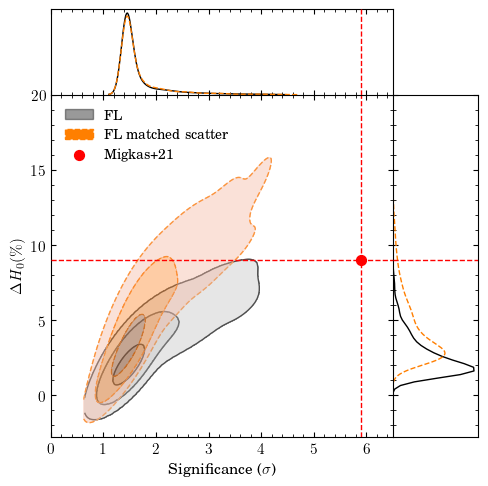

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
plt.style.use('./nice.mplstyle')

# Load both datasets
flamingo = pd.read_csv('../data/analysis_all/h0_mc_joint_all.csv')
other = pd.read_csv('../data/analysis_all/h0_mc_joint_scatter_all.csv')  # adjust filename

# Define KDE parameters
levels = (0.011, 0.14, 0.61, 1.)
bw = 2.0

# Define color palette
color0 = 'black'
color1 = '#ff7f00'

# Create plot
g = sns.JointGrid(data=flamingo,
                  x='Significance', 
                  y='DeltaH0',
                  space=0,
                  ratio=4,
                  height=5,
                  xlim=(0, 6.5),
                  ylim=(-2.8, 20),
                  )

# Plot FLAMINGO KDE
sns.kdeplot(flamingo, x='Significance', y='DeltaH0',
            ax=g.ax_joint,
            fill=False,
            levels=levels,
            bw_adjust=bw,
            color=color0,
            linestyles='solid',
            zorder=1)

sns.kdeplot(flamingo, x='Significance', y='DeltaH0',
            ax=g.ax_joint,
            fill=True,
            levels=levels,
            bw_adjust=bw,
            color=color0,
            alpha=0.4,
            zorder=2)

# Plot OTHER KDE
sns.kdeplot(other, x='Significance', y='DeltaH0',
            ax=g.ax_joint,
            fill=False,
            levels=levels,
            bw_adjust=bw,
            color=color1,
            linestyles='dashed',
            zorder=1)

sns.kdeplot(other, x='Significance', y='DeltaH0',
            ax=g.ax_joint,
            fill=True,
            levels=levels,
            bw_adjust=bw,
            color=color1,
            alpha=0.4,
            zorder=2)

# Marginals for FLAMINGO (you could also add for OTHER if desired)
sns.kdeplot(flamingo['Significance'], ax=g.ax_marg_x, color=color0, linestyle='solid')
sns.kdeplot(y=flamingo['DeltaH0'], ax=g.ax_marg_y, color=color0, linestyle='solid')

sns.kdeplot(other['Significance'], ax=g.ax_marg_x, color=color1, linestyle='dashed')
sns.kdeplot(y=other['DeltaH0'], ax=g.ax_marg_y, color=color1, linestyle='dashed')

# Add reference line and point
x_point, y_point = 5.9, 9.0
g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
point = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, label='Migkas+21', zorder=10)

# Marginal spine visibility
for ax in [g.ax_marg_x, g.ax_marg_y]:
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(True)

# Manual legend with Line2D
import matplotlib.patches as mpatches
contour1 = mpatches.Patch(color=color0, alpha=0.4, linestyle='solid', label='FL')
contour2 = mpatches.Patch(color=color1, linestyle='dashed', label='FL matched scatter')

g.ax_joint.legend(handles=[contour1, contour2, point], loc='upper left', fontsize=10)

# Axis labels
g.ax_joint.set_xlabel('Significance ($\sigma$)')
g.ax_joint.set_ylabel('$\Delta H_0 (\%)$')

# Show
plt.savefig('./to_paper/h0mc_hist_joint_combined.pdf', bbox_inches='tight')
plt.show()
